<a href="https://colab.research.google.com/github/swastikbanerjee/CV_Lab/blob/main/cv_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

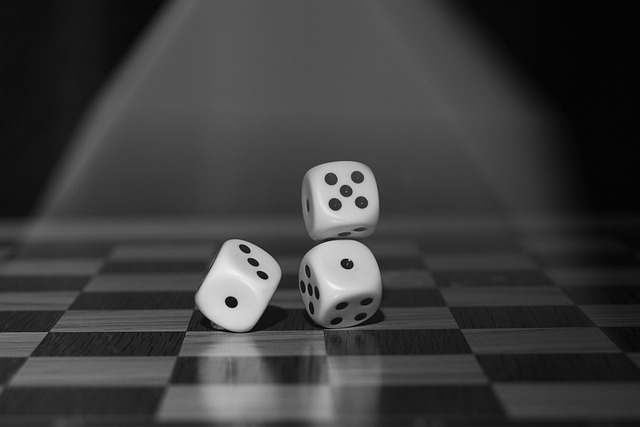

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = cv2.imread("img.jpg")
cv2_imshow(image)

Kernels:
Identity Kernel: This kernel preserves the original image and has no effect on it. It's represented by a small matrix with 1 at the center and zeros elsewhere.

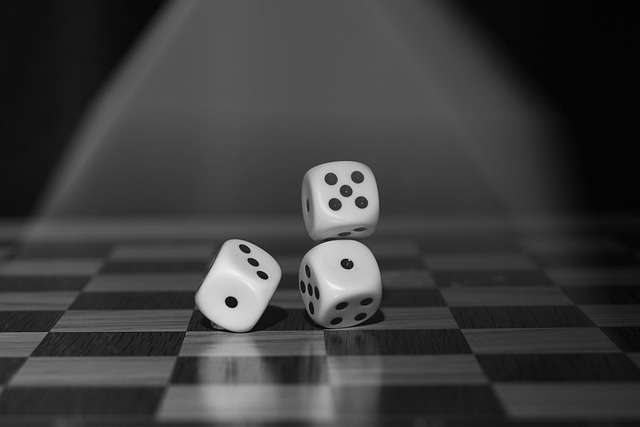

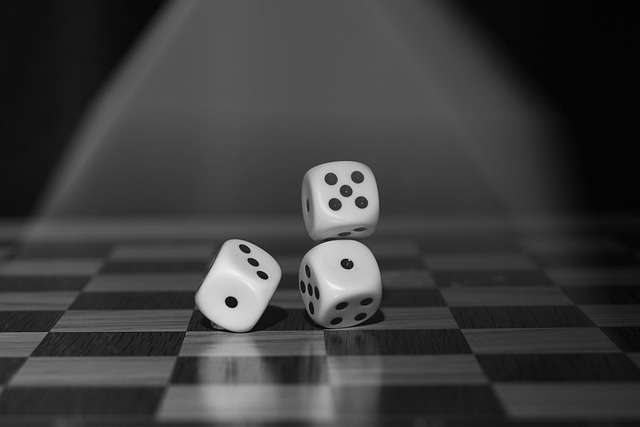

In [ ]:
#Identity kernel
ikernel = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=ikernel)
cv2_imshow(image)
cv2_imshow(img)

Edge Detection Kernel: This kernel highlights edges in the image by emphasizing differences in intensity between neighboring pixels. It typically has positive and negative values that detect edges in different directions.

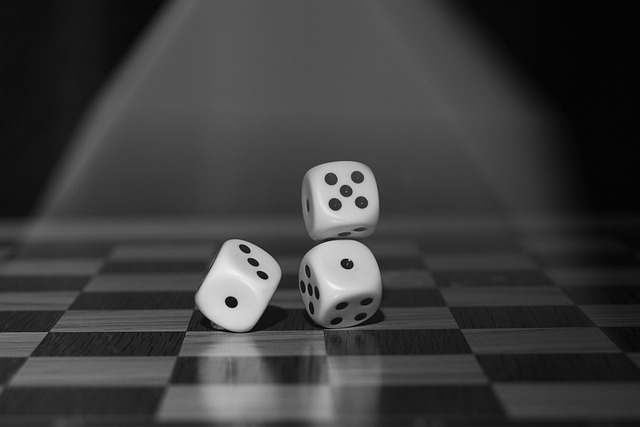

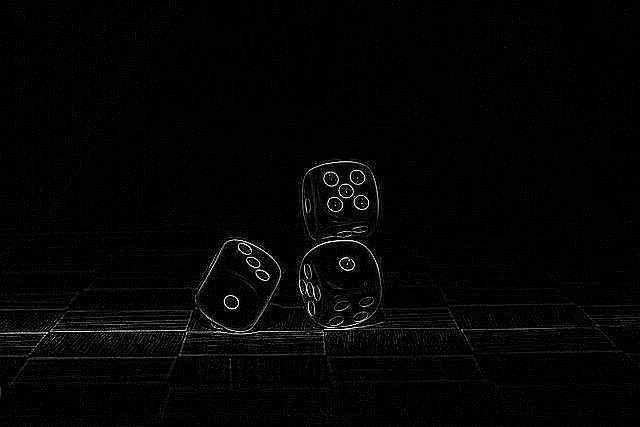

In [ ]:
#Edge Detection kernel
ikernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=ikernel)
cv2_imshow(image)
cv2_imshow(img)

Sharpen Kernel: This kernel enhances edges and fine details in the image by emphasizing the difference between a pixel and its neighbors.

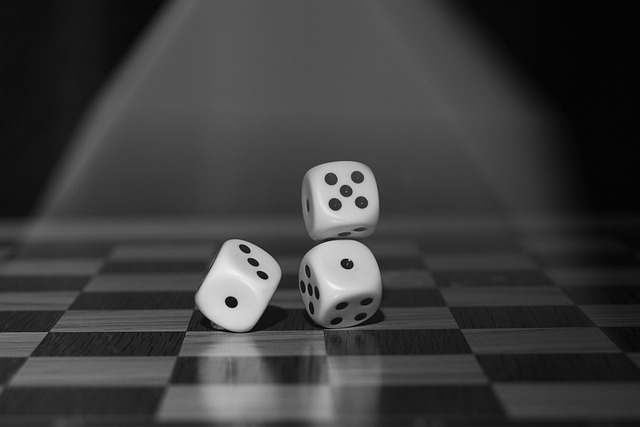

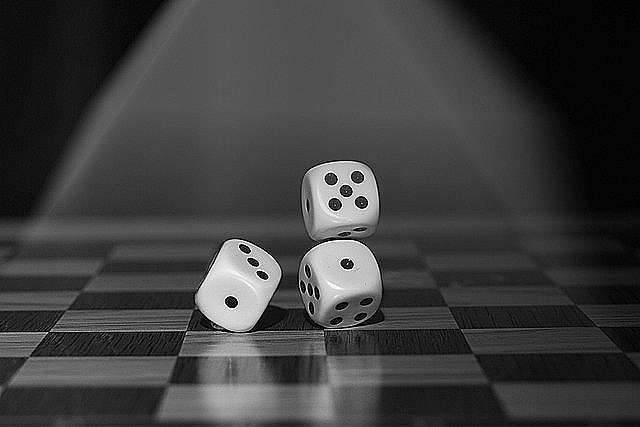

In [ ]:
#Sharpen kernel
ikernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=ikernel)
cv2_imshow(image)
cv2_imshow(img)

Box Blur Kernel: This kernel blurs the image by averaging the pixel values in its neighborhood. It's represented by a matrix of equal weights

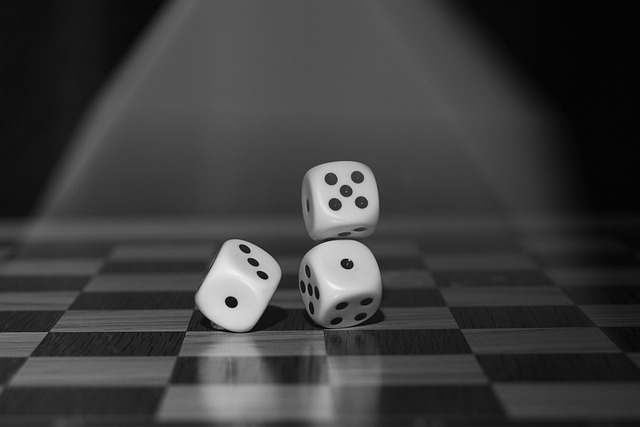

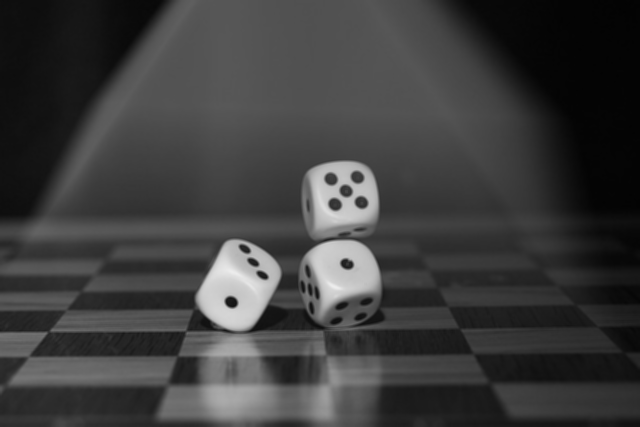

In [ ]:
#BoxBlur kernel
ikernel = np.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=ikernel)
cv2_imshow(image)
cv2_imshow(img)

Gaussian Blur Kernel: This kernel applies a Gaussian blur to the image, which is a more sophisticated blur technique that preserves edges better than a simple box blur.

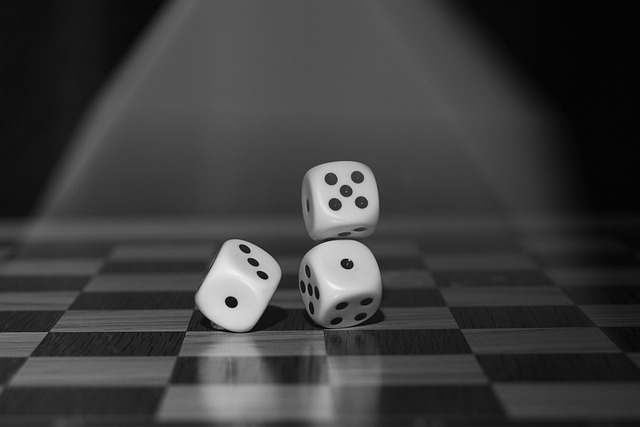

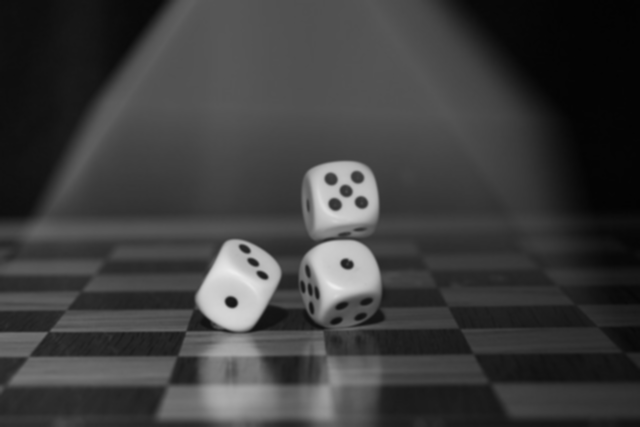

In [ ]:
#Gaussian Blur kernel
ikernel = np.array([[1/256, 4/256, 6/256,4/256,1/256],
                    [4/256, 16/256, 24/256,16/256,4/256],
                    [6/256, 24/256, 36/256,24/256,6/256],
                    [4/256, 16/256, 24/256,16/256,4/256],
                    [1/256, 4/256, 6/256,4/256,1/256]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=ikernel)
cv2_imshow(image)
cv2_imshow(img)

In [ ]:
from scipy import ndimage

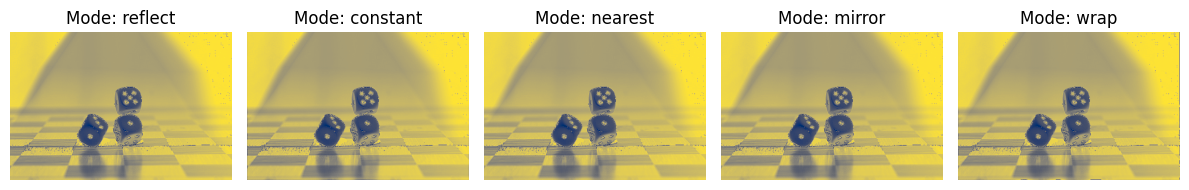

In [ ]:
from PIL import Image
image_path = '/content/img.jpg'
image = np.array(Image.open(image_path).convert('L'))
ke = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
modes = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']
plt.figure(figsize=(12, 6))
for i, mode in enumerate(modes, 1):
    convolved_image = ndimage.convolve(image, ke, mode=mode, cval=0.3)
    plt.subplot(1, 5, i)
    plt.imshow(convolved_image, cmap='cividis_r')
    plt.title(f'Mode: {mode}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Convolution Modes:

Reflect: In this mode, the image is extended by reflecting the last pixel about the edge. It helps to avoid abrupt changes in intensity at the image boundaries.
For example, [1,2,3,4] becomes [4,3,2,1,2,3,4]

Constant: The image is extended by filling all values beyond the edge with a constant value. This mode is useful when you want to assume a specific value for the pixels beyond the image boundaries. (cval parameter)

Nearest: This mode extends the image by replicating the last pixel value. It's simple but may introduce artifacts at the edges.

Mirror: The image is extended by reflecting and repeating all edges. This mode is suitable for seamless tiling of images.[1,2,3,4] becomes [3,2,1,2,3,4,3]

Wrap: In this mode, the image is extended by wrapping around to the opposite edge. It's useful for cyclic operations or when you want to treat the image as if it's on a toroidal surface.[1,2,3,4] becomes [1,2,3,4,1,2,3]